<a href="https://colab.research.google.com/github/itsmekusumjha/prediction_score/blob/main/Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP-TSF**/
**TECHNOLOGY TASK-Data Science & Business Analytics**

**Task-Prediction using Supervised ML**(Predict the percentage of an student based on the no. of study hours)

**Submitted by: Kusum Kumari Jha**



In [ ]:
# Import all the dependencies(libraries)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Uplaod csv file
uploaded = files.upload()


Saving spark (1).csv to spark (1) (1).csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "spark (1).csv" with length 212 bytes


**Data Exploration**

In [ ]:
#reading data
data=pd.read_csv(r'/content/spark.csv')
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#reading tail data from dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
#exploring the dataset(in terms of rows and column)
data.shape 

(25, 2)

In [ ]:
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#  The dataset contain 25 rows and 2 columns 

In [ ]:
# exploring statistical details(count,mean,std,min,etc) of dataset
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Data Cleaning**

In [ ]:
#check null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#No null value present

In [ ]:
data.isna().any().any()

False

In [ ]:
# No missing value present

In [ ]:
# Visualization(ploting graph to retreive the relationship between the two variables)

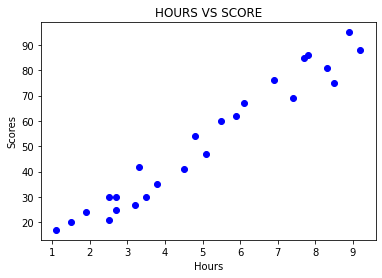

In [ ]:
plt.plot(data['Hours'],data['Scores'],'bo')
plt.title('HOURS VS SCORE')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
# The grapgh shows that there is positive linear correlation between hours and score


**Modeling**

In [ ]:
# Importing dependencies for modeling


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# We are going to segregate data into training set and test set

In [ ]:
train=data.drop(['Scores'],axis=1)
test=data['Scores']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=0)


In [ ]:
# Training the Algorithm

In [ ]:
regr=LinearRegression()


In [ ]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred=regr.predict(x_test)
pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Modeling done

**Accuracy and Error**

In [ ]:
# Finding the value of intercept 
print(regr.intercept_)

2.018160041434662


In [ ]:
# Finding the value of coefficient
print(regr.coef_)

[9.91065648]


In [ ]:
# This shows that if we increase the study hour by 1 ,score will increase by 9.91065648

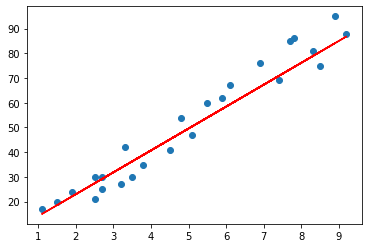

In [ ]:
# Visualization of intercept and coefficent
line=regression.coef_*x+regression.intercept_
plt.scatter(x,y)
plt.plot(x,line,'r');
plt.show()

In [ ]:
# Checking accuracy and error

In [ ]:

regr.score(x_test,y_test)

0.9454906892105354

In [ ]:
# Accuracy is 0.9454906892105354

In [ ]:
score=pd.DataFrame({'Actual': y_test, 'Predicted':pred})
score

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [ ]:
from sklearn import metrics
print('mean absolute error',metrics.mean_absolute_error(y_test,pred))
print('mean squared error',metrics.mean_squared_error(y_test,pred))
print('root mean sqr error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))



mean absolute error 4.183859899002982
mean squared error 21.598769307217456
root mean sqr error: 4.647447612100373


**Testing the provided data**

In [ ]:
# Predicting score if a student studies for 9.25 hrs/day

In [ ]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred=regr.predict(test)
print("Studied Hours=",format(hours))
print("Predicted Score=",format(pred[0]))

Studied Hours= 9.25
Predicted Score= 93.69173248737539


In [ ]:
 # It was a found that if a student studies for 9.25 hrs/day ,he/she will score 93.69173248737539
 